In [23]:
import subprocess
from astropy.nddata.utils import Cutout2D
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
hm_lenses = 5
#first add lenses

#call bash script ot make lenses (can hard-code the number of lenses)
subprocess.check_output(["chmod", "+x",  "simulate_lenses_hardcoded"])
subprocess.check_output(["./simulate_lenses_hardcoded"])

#cut image into pieces

'Generating simulations\n======== make_lenses.py entered ==============\n===== parameter randomizing done ======\n===== parameter randomizing done ======\n===== parameter randomizing done ======\n===== parameter randomizing done ======\n===== parameter randomizing done ======\nlens 0\nlens 1\nlens 2\nlens 3\nlens 4\nHow many lenses do you want to build from parameter files?\nBuilt 0\n\tCreate the seeing filter\nWRITE: FITS file: lens_image_0.fits[200,200] (-80.00:80.60 -80.00:80.60)\nWRITE: FITS file: source.fits[40,40] (-20.00:20.00 -20.00:20.00)\nBuilt 1\n\tCreate the seeing filter\nWRITE: FITS file: lens_image_1.fits[200,200] (-80.00:80.60 -80.00:80.60)\nWRITE: FITS file: source.fits[40,40] (-20.00:20.00 -20.00:20.00)\nBuilt 2\n\tCreate the seeing filter\nWRITE: FITS file: lens_image_2.fits[200,200] (-80.00:80.60 -80.00:80.60)\nWRITE: FITS file: source.fits[40,40] (-20.00:20.00 -20.00:20.00)\nBuilt 3\n\tCreate the seeing filter\nWRITE: FITS file: lens_image_3.fits[200,200] (-80.00:8

In [80]:
#Load large image
image = fits.open("j8de44010_drz.fits")[1].data #currently this script only grabs from 1 HST image that you provide it
max_val = image.max()
min_val = image.min()
# load lenses and scale them
lens_list = [] 
for i in range(hm_lenses): 
    tmp =fits.open("lens_image_"+ str(lens_number)+".fits")[0].data.reshape(-1,)
    lens_list.append(tmp)
    lens_list[lens_number] = minmax_scale(lens_list[lens_number],feature_range=(min_val, max_val*0.75))
    lens_list[lens_number] = lens_scaled[lens_number].reshape(tmp.shape[0],tmp.shape[1])

IndexError: list index out of range

In [68]:
#add the scaled lenses to the big image
import random
for i in range(hm_lenses):
    top_left_x  = random.randint(0, image.shape[0]-200)
    top_left_y = random.randint(0, image.shape[1]-200)
    print(top_left_x)
    print(image[top_left_y:top_left_y+200, top_left_x:top_left_x+200].shape)
    print(lens_list[i].shape)
    image = np.add(image[top_left_y:top_left_y+200, top_left_x:top_left_x+200], lens_list[i])

0
(200, 200)
(200, 200)
0
(200, 200)
(40000,)


ValueError: operands could not be broadcast together with shapes (200,200) (40000,) 

In [74]:
lens_list[0].shape

(200, 200)

In [12]:
'''          TRY SIMULATING AND LOADING pixel.fits AGAIN IT WILL BE 200,200


This script receives .fits images from lenstool, padds them to be square arrays, 
scales them based on the image of the lensing source they are to be overlayed with,
then adds the lens and the lensing source images together and stores it in a list called "summed"

in this script you may need to change: 
-"hm_lenses"
-appened more cutouts to the list
-image_size 

'''
from astropy.nddata.utils import Cutout2D
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

image = fits.open("j8de44010_drz.fits")[1].data #currently this script only grabs from 1 HST image that you provide it
print("image loaded")

image_size=200
cutout_list =[]
cutout_list.append( Cutout2D(image, (3538,3591), (image_size)))
cutout_list.append( Cutout2D(image, (818,1139), (image_size)))
cutout_list.append( Cutout2D(image, (2789,889), (image_size)))
cutout_list.append( Cutout2D(image, (2633,2839), (image_size)))

padded = []
lens_scaled = []
summed = []
hm_lenses =1


for lens_number in range(hm_lenses):
    lens = fits.open("lens_image_"+ str(lens_number)+".fits")[0].data
    padded.append(np.zeros((200,200))) #assuming you set BG noise to 0
    for i in range(175):
        padded[lens_number][i+12] = lens[i] #offset by 12 to get lens right in the middle

#print(padded[0].shape)

for lens_number in range(hm_lenses):
    lens_scaled.append(padded[lens_number].reshape(-1,))
    lens_scaled[lens_number] = minmax_scale(lens_scaled[lens_number],feature_range=(cutout_list[lens_number].data.min(), cutout_list[lens_number].data.max()*0.75))
    lens_scaled[lens_number] = lens_scaled[lens_number].reshape(padded[0].shape[0],padded[0].shape[1])
#print(lens_scaled[3].shape)

for lens_number in range(hm_lenses):    
    summed.append(np.add(cutout_list[lens_number].data,lens_scaled[lens_number]))    

image loaded


IndexError: list index out of range

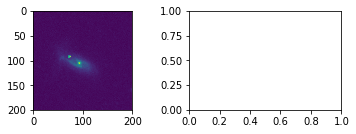

In [13]:


plt.subplot(221)
plt.imshow(summed[0])
plt.subplot(222)
plt.imshow(summed[1])
plt.subplot(223)
plt.imshow(summed[2])
plt.subplot(224)
plt.imshow(summed[3])


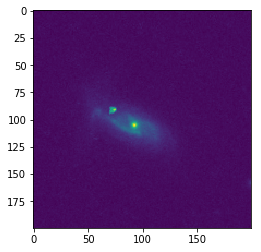

In [14]:
plt.imshow(summed[0])

In [ ]:
lens = fits.open("pixel0.fits")[0].data
plt.subplot(221)
plt.imshow(lens) 


In [ ]:
lens.max()


In [ ]:

padded = np.zeros((200,200))
for i in range(175):
    padded[i+12] = lens[i] #offset by 12 to get lens right in the middle
print(padded.shape)
plt.imshow(padded) 


In [ ]:
from sklearn.preprocessing import minmax_scale

#normalize min max to that of real image
lens_scaled=padded.reshape(-1,)
lens_scaled = minmax_scale(lens_scaled ,feature_range=(cutout_list[0].data.max()*0.0, cutout_list[0].data.max()*0.5))
lens_scaled = lens_scaled.reshape(padded.shape[0],padded.shape[1])
plt.imshow(lens_scaled) 

In [ ]:
lens_scaled.shape

In [ ]:

image =0
summed = np.add(cutout_list[image].data,lens_scaled)
plt.imshow(summed)


resolved_summed.max()

In [ ]:
resolved_summed.max()

In [ ]:
low_noise

In [19]:
lens = fits.open("pixel0.fits")[0].data

In [20]:
lens.shape

(175, 200)

In [75]:
import random
(float(random.randint(101,151))/100.)

1.45

168

In [82]:
import pandas